# Exome Pipeline

In [5]:
import subprocess
import os
import sys
from shlex import split

import numpy as np 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import functools

from interactPlots import *

import yaml

In [6]:
#Read options file

with open("options.yaml", 'r') as stream:
    data = yaml.safe_load(stream)

In [7]:
#Set environment variables

os.environ["SENTIEON_INSTALL_DIR"] = data['SENTIEON_INSTALL_DIR']
os.environ["SENTIEON_LICENSE"]= data['SENTIEON_LICENSE']
os.environ["BCFTOOLS_PLUGINS"]= data['bcfdir']

In [8]:
#Set working directory

data['home'] = os.getcwd()+"/"
#data['workdir'] = "/home/adefalco/"+ "/" + data['batch'] + "/"
data['workdir'] = data['home'] + data['batch'] + "/"

if not os.path.isdir(data['workdir']): 
    os.mkdir(data['workdir']) 
 
data['SENTIEON_TMPDIR'] = data['workdir']+"/$SAMPLE/tmpdir"

## Batch

In [9]:
#Read batch

data['samplelist'] = data['home']+data['batch']+".txt"

batch = []
with open (data['samplelist'], 'r') as f:
    for row in csv.reader(f,delimiter='\t'):
            batch.append(row)
           
batchSize = int(np.size(batch)/np.size(batch,1))        
print(tabulate(batch, headers =["Sample","Tumor", "Normal"]))

Sample        Tumor    Normal
------------  -------  --------
ABT414_Flank  A1783    control
ABT414_Flank  A9155    control
ABT414_Flank  A9878    control
ABT414_Flank  AT2550   control
ABT414_Flank  AT2822   control
ABT414_Flank  AT4415   control
ABT414_Flank  AT4808   control
ABT414_Flank  C0288    control
ABT414_Flank  C0334    control
ABT414_Flank  C1572    control
ABT414_Flank  C8448    control


In [10]:
#Dropdown widgets

tumors = [row[1] for row in batch]

widgTum = widgets.Dropdown(
    options= tumors,
    disabled=False,
)  

lists = tumors.copy()
lists.append('ALL')

widgTumAll = widgets.Dropdown(
    options= lists,
    value='ALL',
    disabled=False,
) 

#normals = [row[0] for row in batch]
normals = [batch[0][0]]
#lists = normals.copy()
#lists.append('ALL')

widgNor = widgets.Dropdown(
    options= normals,
    #value='ALL',
    disabled=False,
)  

In [11]:
print(tumors)

['A1783', 'A9155', 'A9878', 'AT2550', 'AT2822', 'AT4415', 'AT4808', 'C0288', 'C0334', 'C1572', 'C8448']


In [9]:
os.chdir(data['workdir'])
exec_scripts = False #Run shell scripts

# 1a. Mapping reads with BWA-MEM, sorting for normal sample
The results of this call are dependent on the number of threads used. To have number of threads independent results, add chunk size option -K 10000000

In [9]:
ERROR = "error"
SAMPLE = batch[0][0]
"""for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    NORMAL = batch[i][2] """
command = "(" + data['SENTIEON_INSTALL_DIR']+"/bin/sentieon bwa mem -M -R '@RG\\tID:"+SAMPLE+"N\\tSM:"+SAMPLE+"N\\tPL:"+data['platform']+"' -t "+str(data['nt'])+" -K 10000000 "+data['fasta']+" "+data['fastq_folder_NORMAL']+"/*_"+data['fastq_1_suffix']+" "+data['fastq_folder_NORMAL']+"/*_"+data['fastq_2_suffix']+" || echo -n "+ ERROR +" ) | "+data['SENTIEON_INSTALL_DIR']+"/bin/sentieon util sort -o "+SAMPLE+"N_sorted.bam -t "+str(data['nt'])+" --sam2bam -i -"
print(command+'\n')
if exec_scripts:
    subprocess.check_output(command, shell=True)

(/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon bwa mem -M -R '@RG\tID:ABT414_FlankN\tSM:ABT414_FlankN\tPL:ILLUMINA' -t 80 -K 10000000 /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414/ABT414_G12_control/controlbam/XenomeData/*_human_1.fastq /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414/ABT414_G12_control/controlbam/XenomeData/*_human_2.fastq || echo -n error ) | /storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon util sort -o ABT414_FlankN_sorted.bam -t 80 --sam2bam -i -



# 1a. Mapping reads with BWA-MEM, sorting for tumor sample
The results of this call are dependent on the number of threads used. To have number of threads independent results, add chunk size option -K 10000000

In [16]:
for i in range(batchSize):
    #SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    #NORMAL = batch[i][2] 
    command = "(" + data['SENTIEON_INSTALL_DIR']+"/bin/sentieon bwa mem -M -R '@RG\\tID:"+TUMOR+"T\\tSM:"+TUMOR+"T\\tPL:"+data['platform']+"' -t "+str(data['nt'])+" -K 10000000 "+data['fasta']+" "+data['fastq_folder']+"/"+TUMOR+"/*_"+data['fastq_1_suffix']+" "+data['fastq_folder']+"/"+TUMOR+"/*_"+data['fastq_2_suffix']+" || echo -n "+ ERROR +" ) | "+data['SENTIEON_INSTALL_DIR']+"/bin/sentieon util sort -o "+TUMOR+"T_sorted.bam -t "+str(data['nt'])+" --sam2bam -i -"
    print(command+'\n')
    if exec_scripts:
        subprocess.check_output(command, shell=True)

(/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon bwa mem -M -R '@RG\tID:A1783T\tSM:A1783T\tPL:ILLUMINA' -t 80 -K 10000000 /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414/ABT414_Flank/WES/RawData/XenomeData/A1783/*_human_1.fastq /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414/ABT414_Flank/WES/RawData/XenomeData/A1783/*_human_2.fastq || echo -n error ) | /storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon util sort -o A1783T_sorted.bam -t 80 --sam2bam -i -

(/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon bwa mem -M -R '@RG\tID:A9155T\tSM:A9155T\tPL:ILLUMINA' -t 80 -K 10000000 /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414/ABT414_Flank/WES/RawData/XenomeData/A9155/*_human_1.fastq /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414/ABT414_Flank/WES/RawData/Xeno

# 2a. Metrics for normal sample

In [11]:
command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+SAMPLE+"N_sorted.bam --algo MeanQualityByCycle "+SAMPLE+"N_mq_metrics.txt --algo QualDistribution "+SAMPLE+"N_qd_metrics.txt --algo GCBias --summary "+SAMPLE+"N_gc_summary.txt "+SAMPLE+"N_gc_metrics.txt --algo AlignmentStat --adapter_seq '' "+SAMPLE+"N_aln_metrics.txt --algo InsertSizeMetricAlgo "+SAMPLE+"N_is_metrics.txt"
print(command1+'\n')
if exec_scripts:
    subprocess.check_output(command1,shell=True)


/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i ABT414_FlankN_sorted.bam --algo MeanQualityByCycle ABT414_FlankN_mq_metrics.txt --algo QualDistribution ABT414_FlankN_qd_metrics.txt --algo GCBias --summary ABT414_FlankN_gc_summary.txt ABT414_FlankN_gc_metrics.txt --algo AlignmentStat --adapter_seq '' ABT414_FlankN_aln_metrics.txt --algo InsertSizeMetricAlgo ABT414_FlankN_is_metrics.txt



CATEGORY: Distinguishes either PAIRED: for a fragment run, FIRST_OF_PAIR: when metrics are for only the first read in a paired run, SECOND_OF_PAIR: when metrics are for only the second read in a paired run, or PAIR when metrics are aggregated for both first and second reads in a pair. 

Total Reads: The total number of reads 

PF_READS_ALIGNED: The number of reads that aligned to the reference sequence

PCT_PF_READS_ALIGNED: The percentage of reads that aligned to the reference sequence

In [18]:
"""from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import functools
from interactPlots import *

inter = interact(tableShow, Sample=widgNor, file=fixed("_N_aln_metrics.txt"), cols = fixed([0,1,2,5,6]), listSample = fixed([]));
display(inter)"""

interactive(children=(Dropdown(description='Sample', options=('ABT414_Flank',), value='ABT414_Flank'), Output(…

<function interactPlots.tableShow(Sample, file, cols, listSample)>

In [119]:
from IPython.display import HTML
import csv 
import json 
  
path = "/storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414_WES_Analysis/ABT414_Flank/ABT414_Flank/"
Sample = normals[0] #"ABT414_Flank"
file = "_N_aln_metrics.txt"
    
def make_json(csvFilePath,keyName,alldata): 
      
    # create a dictionary 
    data = {} 
    
    
    # Open a csv reader called DictReader 
    with open(csvFilePath, encoding='utf-8') as csvf: 
        next(csvf)
        
        csvReader = csv.DictReader(csvf, delimiter='\t') 
          
        # Convert each row into a dictionary  
        # and add it to data 
        for rows in csvReader: 

            # Assuming a column named 'No' to 
            # be the primary key 
            key = rows['CATEGORY'] 
            data[key] = rows 
  
        alldata[keyName] = data

    jsonfile = json.dumps(alldata)
    
    return jsonfile
  
# Driver Code 
  
# Decide the two file paths according to your  
# computer system 
  
# Call the make_json function 
csvFilePath = data['home']+Sample+file

csvFilePath = path+Sample+file

alldata = {}
jsonfile = make_json(csvFilePath,Sample,alldata)

#print(jsonfile)

id = 0
id = id +1

javascript = """

<select id='selectSample"""+str(id)+"""'>  </select>

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<head>

<style>
table, td {
  border: 1px solid black;
}
</style>

</head>

<body>

<table id="myTable"""+str(id)+""""></table>
<br>

<script type="text/Javascript">

function myDropdown(sel,opts) {

for(var i = 0; i < opts.length; i++) {
    var opt = opts[i];
    var el = document.createElement("option");
    el.textContent = opt;
    el.value = opt;
    if (i < 1) {
        el.selected = "true";
    }
    sel.appendChild(el);
}

}

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["ABT414_Flank"];

myDropdown(select,options)

var obj = JSON.parse('"""+jsonfile+"""');

var type"""+str(id)+""" = "_N_gc-report.pdf"

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myTable+str(id)+""""(type"""+str(id)+""","""+str(id)+""")};

function myTable(type,idd) {

  var x = document.getElementById("selectSample"+idd).value;
  document.getElementById("myText"+idd).innerHTML = x;
  
  var table = document.getElementById("myTable"+idd);
  
  while(table.rows[0]) table.deleteRow(0);
  
  
  
  i = 0;
  
  var obj2 = obj[x];
  
  Object.keys(obj2).forEach(function(k){
  
    var row = table.insertRow(i);
    i = i+1;
    var cell1 = row.insertCell(0);
    var cell2 = row.insertCell(1);
    var cell3 = row.insertCell(2);
    var cell4 = row.insertCell(3);
    cell1.innerHTML = k;
    cell2.innerHTML = obj2[k].TOTAL_READS;
    cell3.innerHTML = obj2[k].PF_READS_ALIGNED;
    cell4.innerHTML = obj2[k].PCT_PF_READS_ALIGNED;
    
  });
  
}

myTable(type"""+str(id)+""","""+str(id)+""")

</script>
</body>
"""

HTML(javascript)

In [97]:
command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot GCBias -o "+SAMPLE+"N_gc-report.pdf "+SAMPLE+"N_gc_metrics.txt"
print(command2+'\n')
if exec_scripts:        
    subprocess.check_output(command2,shell=True)

NameError: name 'SAMPLE' is not defined

In [120]:
#interact(plots, Sample=widgNor, file=fixed("_N_gc-report.pdf"), normal=fixed(True), listSample = fixed([]));
#embed_minimal_html('export.html', views=test, title='Widgets export')



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

function myFunction(type,idd) {
  var x = document.getElementById("selectSample"+idd).value;
  document.getElementById("myText"+idd).innerHTML = x;
  document.getElementById("pdf"+idd).src = x+type;

}

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["ABT414_Flank"];

myDropdown(select,options)

var type"""+str(id)+""" = "_N_gc-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};



</script>
"""

HTML(input_form + javascript)





In [62]:
command3 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot QualDistribution -o "+SAMPLE+"N_qd-report.pdf "+SAMPLE+"N_qd_metrics.txt"
print(command3+'\n')
if exec_scripts:
    subprocess.check_output(command3,shell=True)

NameError: name 'data' is not defined

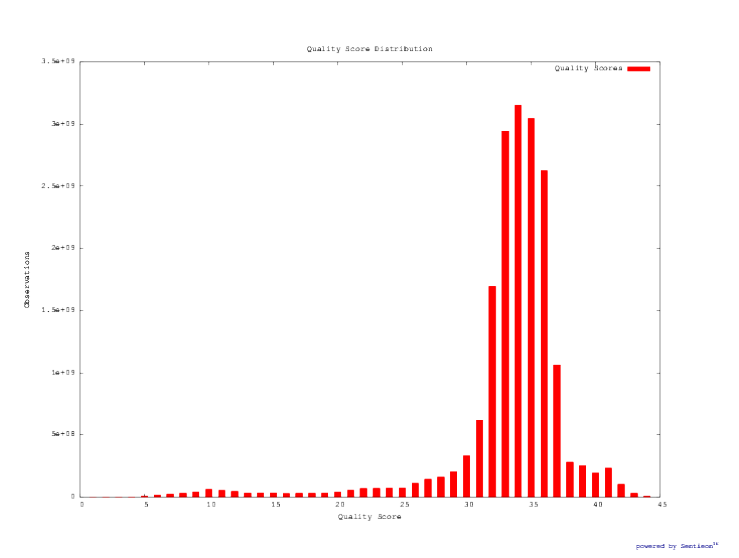

In [15]:
#interact(plots, Sample=widgNor, file=fixed("_N_qd-report.pdf"), normal=fixed(True), listSample = fixed([]));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["ABT414_Flank"];

myDropdown(select,options)

var type"""+str(id)+""" = "_N_qd-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)



In [16]:
command4 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot MeanQualityByCycle -o "+SAMPLE+"N_mq-report.pdf "+SAMPLE+"N_mq_metrics.txt"
print(command4+'\n')
if exec_scripts:
    subprocess.check_output(command4,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o ABT414_FlankN_mq-report.pdf ABT414_FlankN_mq_metrics.txt



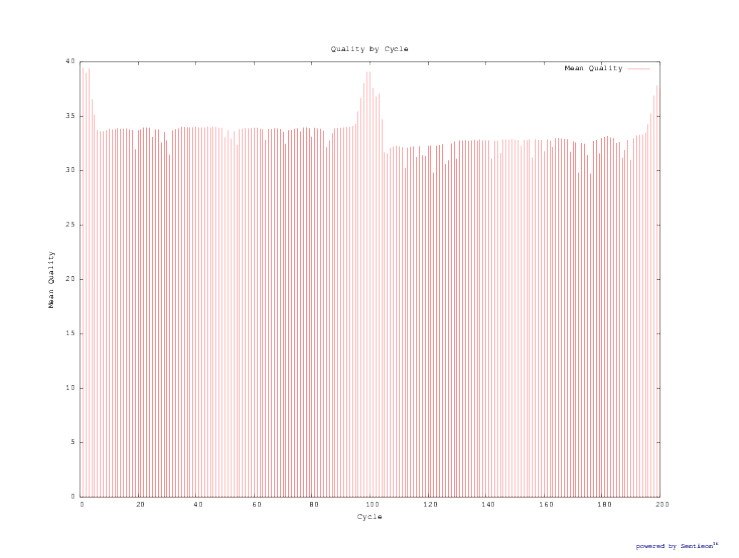

In [17]:
#interact(plots, Sample=widgNor, file=fixed("_N_mq-report.pdf"), normal=fixed(True), listSample = fixed([]));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["ABT414_Flank"];

myDropdown(select,options)

var type"""+str(id)+""" = "_N_mq-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)



In [18]:
command5 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot InsertSizeMetricAlgo -o "+SAMPLE+"N_is-report.pdf "+SAMPLE+"N_is_metrics.txt"
print(command5+'\n')
if exec_scripts:
    subprocess.check_output(command5,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o ABT414_FlankN_is-report.pdf ABT414_FlankN_is_metrics.txt



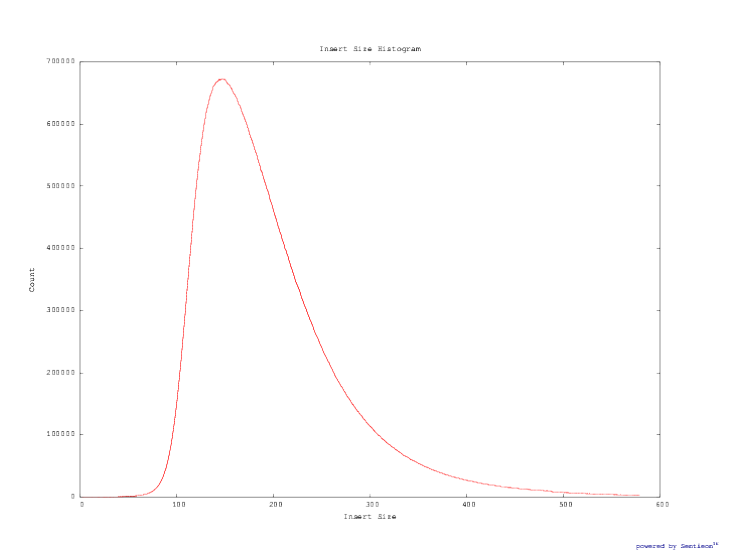

In [19]:
#interact(plots, Sample=widgNor, file=fixed("_N_is-report.pdf"), normal=fixed(True), listSample = fixed([]));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["ABT414_Flank"];

myDropdown(select,options)

var type"""+str(id)+""" = "_N_is-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)



# 2a. Metrics for tumor sample

In [20]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_sorted.bam --algo MeanQualityByCycle "+TUMOR+"T_mq_metrics.txt --algo QualDistribution "+TUMOR+"T_qd_metrics.txt --algo GCBias --summary "+TUMOR+"T_gc_summary.txt "+TUMOR+"T_gc_metrics.txt --algo AlignmentStat --adapter_seq '' "+TUMOR+"T_aln_metrics.txt --algo InsertSizeMetricAlgo "+TUMOR+"T_is_metrics.txt"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_sorted.bam --algo MeanQualityByCycle A1783T_mq_metrics.txt --algo QualDistribution A1783T_qd_metrics.txt --algo GCBias --summary A1783T_gc_summary.txt A1783T_gc_metrics.txt --algo AlignmentStat --adapter_seq '' A1783T_aln_metrics.txt --algo InsertSizeMetricAlgo A1783T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_sorted.bam --algo MeanQualityByCycle A9155T_mq_metrics.txt --algo QualDistribution A9155T_qd_metrics.txt --algo GCBias --summary A9155T_gc_summary.txt A9155T_gc_metrics.txt --algo AlignmentStat --adapter_seq '' A9155T_aln_metrics.txt --algo InsertSizeMetricAlgo A9155T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon

CATEGORY: Distinguishes either PAIRED: for a fragment run, FIRST_OF_PAIR: when metrics are for only the first read in a paired run, SECOND_OF_PAIR: when metrics are for only the second read in a paired run, or PAIR when metrics are aggregated for both first and second reads in a pair. 

Total Reads: The total number of reads 

PF_READS_ALIGNED: The number of reads that aligned to the reference sequence

PCT_PF_READS_ALIGNED: The percentage of reads that aligned to the reference sequence

In [21]:
"""interact(tableShow, Sample=widgTumAll, file=fixed("_T_aln_metrics.txt"), cols = fixed([0,1,2,5,6]), listSample = fixed(tumors));"""


A1783

CATEGORY          TOTAL_READS    PF_READS    PF_READS_ALIGNED    PCT_PF_READS_ALIGNED
--------------  -------------  ----------  ------------------  ----------------------
FIRST_OF_PAIR        29463364    29463364            29460733                0.999911
SECOND_OF_PAIR       29463364    29463364            29427125                0.99877
PAIR                 58926728    58926728            58887858                0.99934

A9155

CATEGORY          TOTAL_READS    PF_READS    PF_READS_ALIGNED    PCT_PF_READS_ALIGNED
--------------  -------------  ----------  ------------------  ----------------------
FIRST_OF_PAIR        36708270    36708270            36704704                0.999903
SECOND_OF_PAIR       36708270    36708270            36657337                0.998612
PAIR                 73416540    73416540            73362041                0.999258

A9878

CATEGORY          TOTAL_READS    PF_READS    PF_READS_ALIGNED    PCT_PF_READS_ALIGNED
--------------  -------------  -

In [114]:
csvFilePath = r'Names.csv'
  
path = "/storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414_WES_Analysis/ABT414_Flank/ABT414_Flank/"
#Sample = tumors[1]
file = "_T_aln_metrics.txt"    
    
# Call the make_json function 
#csvFilePath = data['home']+Sample+file

#csvFilePath = path+Sample+file

#jsonfile = make_json(csvFilePath)

alldata = {}

for i in range(batchSize):
    csvFilePath = path+tumors[i]+file
    jsonfile = make_json(csvFilePath,tumors[i],alldata)
    
id = id +1

javascript = """

<select id='selectSample"""+str(id)+"""'>  </select>

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<head>

<style>
table, td {
  border: 1px solid black;
}
</style>

</head>

<body>

<table id="myTable"""+str(id)+"""""></table>
<br>

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["A9155","A9878","AT2550","AT2822","AT4415","AT4808","C0288","C0334","C1572","C8448"];

myDropdown(select,options)

var obj = JSON.parse('"""+jsonfile+"""');

var type"""+str(id)+""" = "_N_gc-report.pdf"

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myTable(type"""+str(id)+""","""+str(id)+""")};
  
myTable(type"""+str(id)+""","""+str(id)+""")

</script>
</body>
"""

HTML(javascript)

In [22]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot GCBias -o "+TUMOR+"T_gc-report.pdf "+TUMOR+"T_gc_metrics.txt"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o A1783T_gc-report.pdf A1783T_gc_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o A9155T_gc-report.pdf A9155T_gc_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o A9878T_gc-report.pdf A9878T_gc_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o AT2550T_gc-report.pdf AT2550T_gc_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o AT2822T_gc-report.pdf AT2822T_gc_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o AT4415T_gc-report.pdf AT4415T_gc_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot GCBias -o AT4808T_gc-report.pdf AT4808T_

In [56]:
#interact(plots, Sample=widgTumAll, file=fixed("_T_gc-report.pdf"), normal=fixed(False), listSample = fixed(tumors));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["A9155","A9878","AT2550","AT2822","AT4415","AT4808","C0288","C0334","C1572","C8448"];

myDropdown(select,options)

var type"""+str(id)+""" = "_T_gc-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)





In [14]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command3 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot QualDistribution -o "+TUMOR+"T_qd-report.pdf "+TUMOR+"T_qd_metrics.txt"
    print(command3+'\n')
    if exec_scripts:
        subprocess.check_output(command3,shell=True)

NameError: name 'batchSize' is not defined

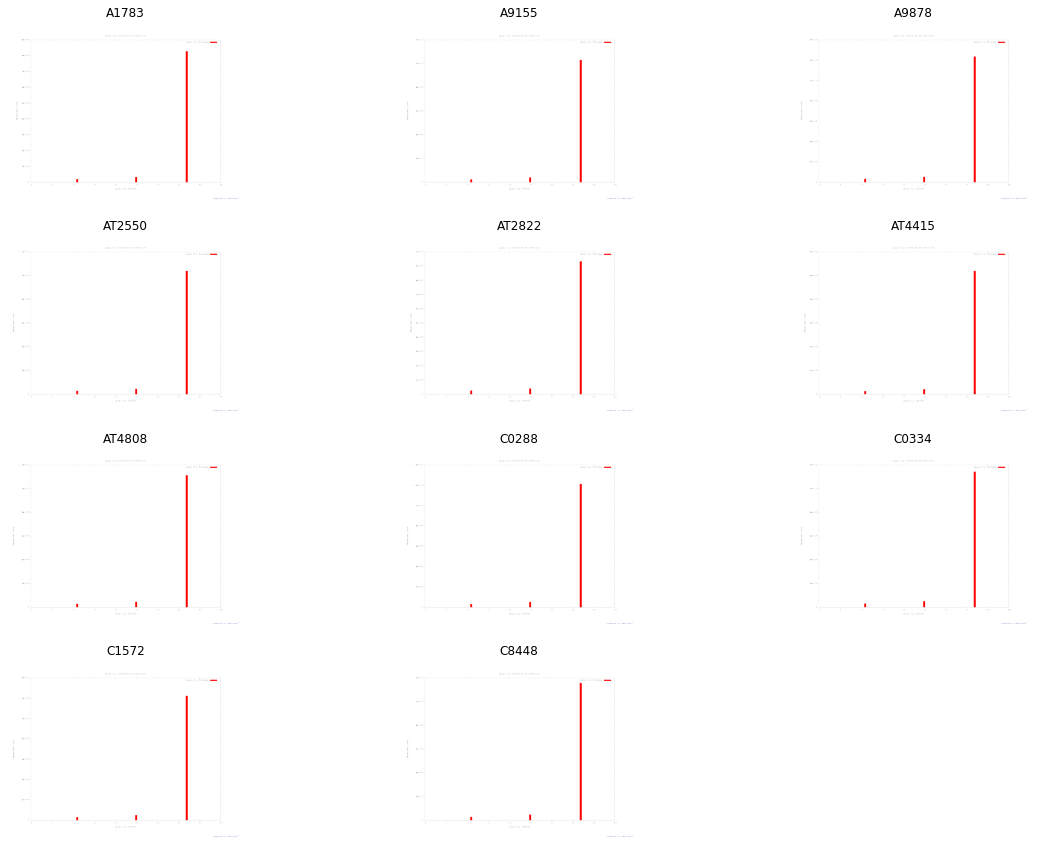

In [25]:
#interact(plots, Sample=widgTumAll, file=fixed("_T_qd-report.pdf"), normal=fixed(False), listSample = fixed(tumors));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["A9155","A9878","AT2550","AT2822","AT4415","AT4808","C0288","C0334","C1572","C8448"];

myDropdown(select,options)

var type"""+str(id)+""" = "_T_qd-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)

In [26]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command4 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot MeanQualityByCycle -o "+TUMOR+"T_mq-report.pdf "+TUMOR+"T_mq_metrics.txt"
    print(command4+'\n')
    if exec_scripts:
        subprocess.check_output(command4,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o A1783T_mq-report.pdf A1783T_mq_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o A9155T_mq-report.pdf A9155T_mq_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o A9878T_mq-report.pdf A9878T_mq_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o AT2550T_mq-report.pdf AT2550T_mq_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o AT2822T_mq-report.pdf AT2822T_mq_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot MeanQualityByCycle -o AT4415T_mq-report.pdf AT4415T_mq_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-ge

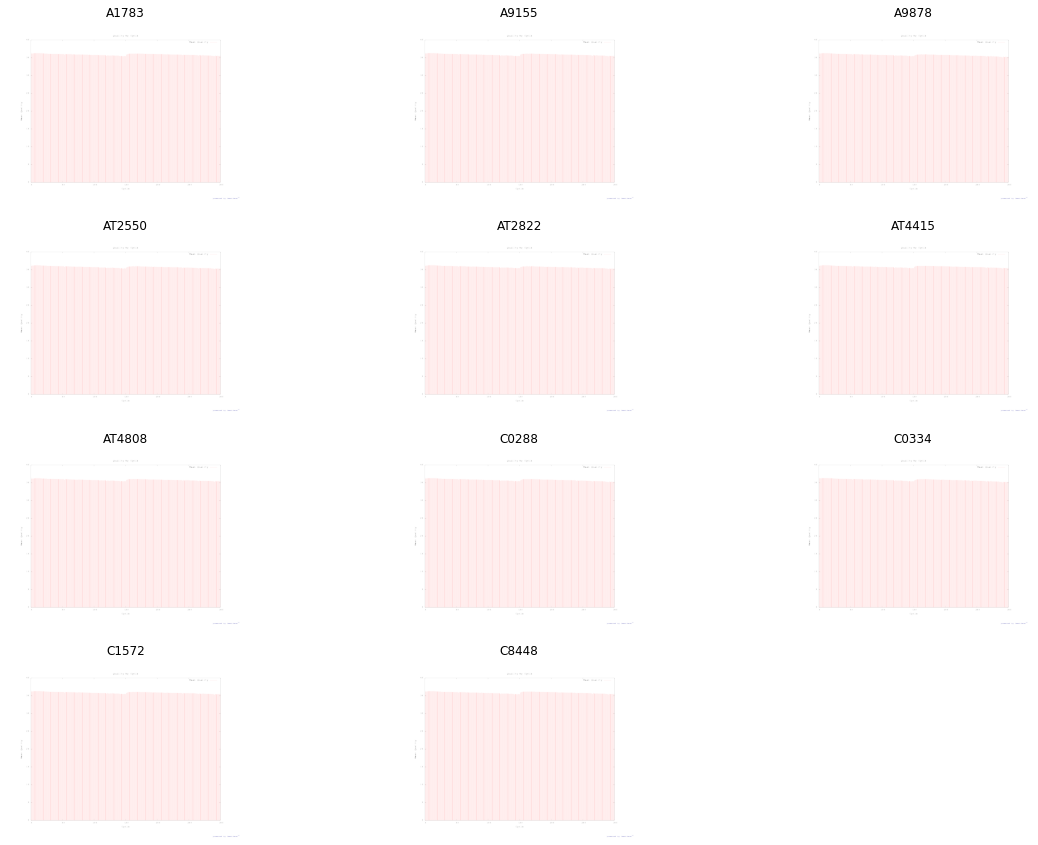

In [27]:
#interact(plots, Sample=widgTumAll, file=fixed("_T_mq-report.pdf"), normal=fixed(False), listSample = fixed(tumors));
#embed_minimal_html('export.html', views=[widgTumAll], title='Widgets export')



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["A9155","A9878","AT2550","AT2822","AT4415","AT4808","C0288","C0334","C1572","C8448"];

myDropdown(select,options)

var type"""+str(id)+""" = "_T_mq-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)

In [28]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command5 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot InsertSizeMetricAlgo -o "+TUMOR+"T_is-report.pdf "+TUMOR+"T_is_metrics.txt"
    print(command5+'\n')
    if exec_scripts:
        subprocess.check_output(command5,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o A1783T_is-report.pdf A1783T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o A9155T_is-report.pdf A9155T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o A9878T_is-report.pdf A9878T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o AT2550T_is-report.pdf AT2550T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o AT2822T_is-report.pdf AT2822T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot InsertSizeMetricAlgo -o AT4415T_is-report.pdf AT4415T_is_metrics.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON

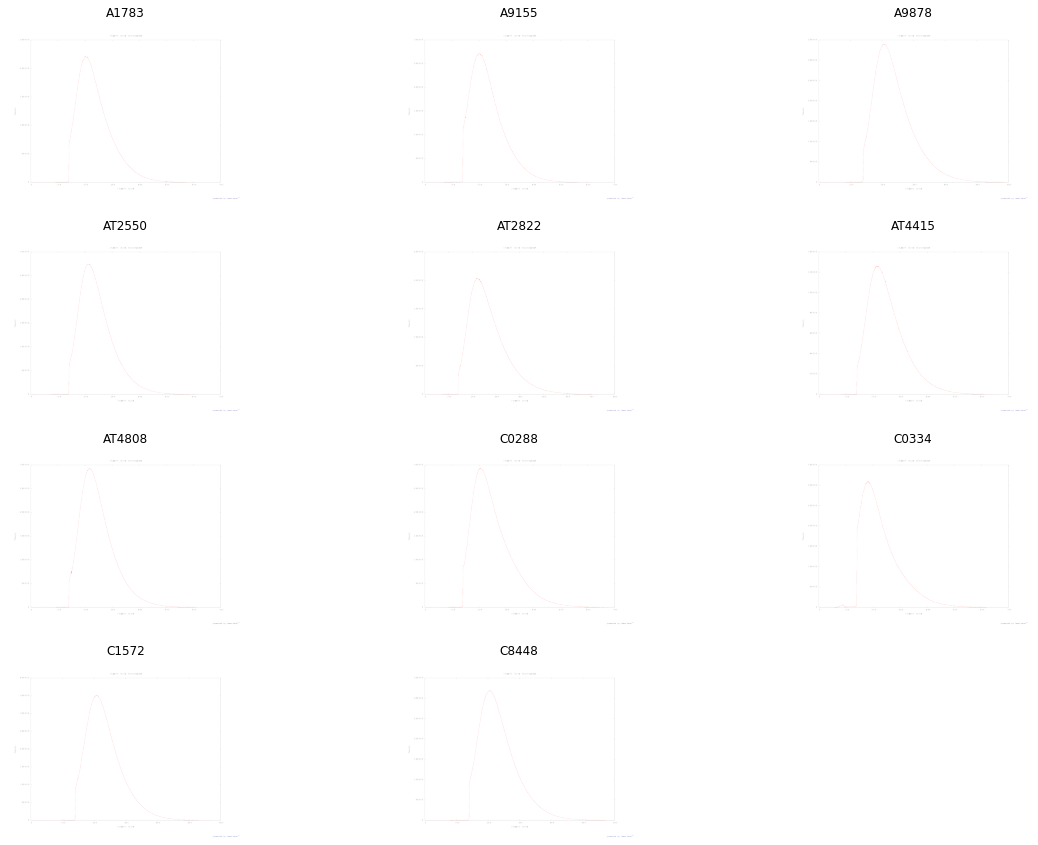

In [29]:
#interact(plots, Sample=widgTumAll, file=fixed("_T_is-report.pdf"), normal=fixed(False), listSample = fixed(tumors));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["A9155","A9878","AT2550","AT2822","AT4415","AT4808","C0288","C0334","C1572","C8448"];

myDropdown(select,options)

var type"""+str(id)+""" = "_T_is-report.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)

# 3a. Remove Duplicate Reads for normal sample

In [30]:
command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -i "+SAMPLE+"N_sorted.bam --algo LocusCollector --fun score_info "+SAMPLE+"N_score.txt"
print(command1+'\n')
if exec_scripts:
    subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i ABT414_FlankN_sorted.bam --algo LocusCollector --fun score_info ABT414_FlankN_score.txt



In [31]:
command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -i "+SAMPLE+"N_sorted.bam --algo Dedup --rmdup --score_info "+SAMPLE+"N_score.txt --metrics "+SAMPLE+"N_dedup_metrics.txt "+SAMPLE+"N_deduped.bam"
print(command2+'\n')
if exec_scripts:
    subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i ABT414_FlankN_sorted.bam --algo Dedup --rmdup --score_info ABT414_FlankN_score.txt --metrics ABT414_FlankN_dedup_metrics.txt ABT414_FlankN_deduped.bam



# 3a. Remove Duplicate Reads for tumor sample

In [32]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -i "+TUMOR+"T_sorted.bam --algo LocusCollector --fun score_info "+TUMOR+"T_score.txt"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i A1783T_sorted.bam --algo LocusCollector --fun score_info A1783T_score.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i A9155T_sorted.bam --algo LocusCollector --fun score_info A9155T_score.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i A9878T_sorted.bam --algo LocusCollector --fun score_info A9878T_score.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i AT2550T_sorted.bam --algo LocusCollector --fun score_info AT2550T_score.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i AT2822T_sorted.bam --algo LocusCollector --fun score_info AT2822T_score.txt

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i AT4415T_sorted.

In [33]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -i "+TUMOR+"T_sorted.bam --algo Dedup --rmdup --score_info "+TUMOR+"T_score.txt --metrics "+TUMOR+"T_dedup_metrics.txt "+TUMOR+"T_deduped.bam"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i A1783T_sorted.bam --algo Dedup --rmdup --score_info A1783T_score.txt --metrics A1783T_dedup_metrics.txt A1783T_deduped.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i A9155T_sorted.bam --algo Dedup --rmdup --score_info A9155T_score.txt --metrics A9155T_dedup_metrics.txt A9155T_deduped.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i A9878T_sorted.bam --algo Dedup --rmdup --score_info A9878T_score.txt --metrics A9878T_dedup_metrics.txt A9878T_deduped.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -i AT2550T_sorted.bam --algo Dedup --rmdup --score_info AT2550T_score.txt --metrics AT2550T_dedup_metrics.txt AT2550T_deduped.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 8

# 4a. Indel realigner for normal sample

In [34]:
command1 = data['SENTIEON_INSTALL_DIR']+ "/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+SAMPLE+"N_deduped.bam --algo Realigner -k "+data['known_Mills_indels']+" -k "+data['known_1000G_indels']+" "+SAMPLE+"N_realigned.bam"
print(command1+'\n')
if exec_scripts:
    subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i ABT414_FlankN_deduped.bam --algo Realigner -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz ABT414_FlankN_realigned.bam



# 4a. Indel realigner for tumor sample

In [35]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+ "/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_deduped.bam --algo Realigner -k "+data['known_Mills_indels']+" -k "+data['known_1000G_indels']+" "+TUMOR+"T_realigned.bam"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_deduped.bam --algo Realigner -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz A1783T_realigned.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_deduped.bam --algo Realigner -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz A9155T_realigned.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes

# 5a. Base recalibration for normal sample

In [36]:
command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+SAMPLE+"N_realigned.bam --algo QualCal -k "+data['dbsnp']+" -k "+data['known_Mills_indels']+" -k "+data['known_1000G_indels']+" "+SAMPLE+"N_recal_data.table"
print(command1+'\n')
if exec_scripts:
    subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i ABT414_FlankN_realigned.bam --algo QualCal -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz ABT414_FlankN_recal_data.table



In [37]:
command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+SAMPLE+"N_realigned.bam -q "+SAMPLE+"N_recal_data.table --algo QualCal -k "+data['dbsnp']+" -k "+data['known_Mills_indels']+" -k "+data['known_1000G_indels']+" "+SAMPLE+"N_recal_data.table.post"
print(command2+'\n')
if exec_scripts:
    subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i ABT414_FlankN_realigned.bam -q ABT414_FlankN_recal_data.table --algo QualCal -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz ABT414_FlankN_recal_data.table.post



In [38]:
command3 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" --algo QualCal --plot --before "+SAMPLE+"N_recal_data.table --after "+SAMPLE+"N_recal_data.table.post "+SAMPLE+"N_recal.csv"
print(command3+'\n')
if exec_scripts:
    subprocess.check_output(command3,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 --algo QualCal --plot --before ABT414_FlankN_recal_data.table --after ABT414_FlankN_recal_data.table.post ABT414_FlankN_recal.csv



In [39]:
command4 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot QualCal -o "+SAMPLE+"N_recal_plots.pdf "+SAMPLE+"N_recal.csv"
print(command4+'\n')
if exec_scripts:
    subprocess.check_output(command4,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o ABT414_FlankN_recal_plots.pdf ABT414_FlankN_recal.csv



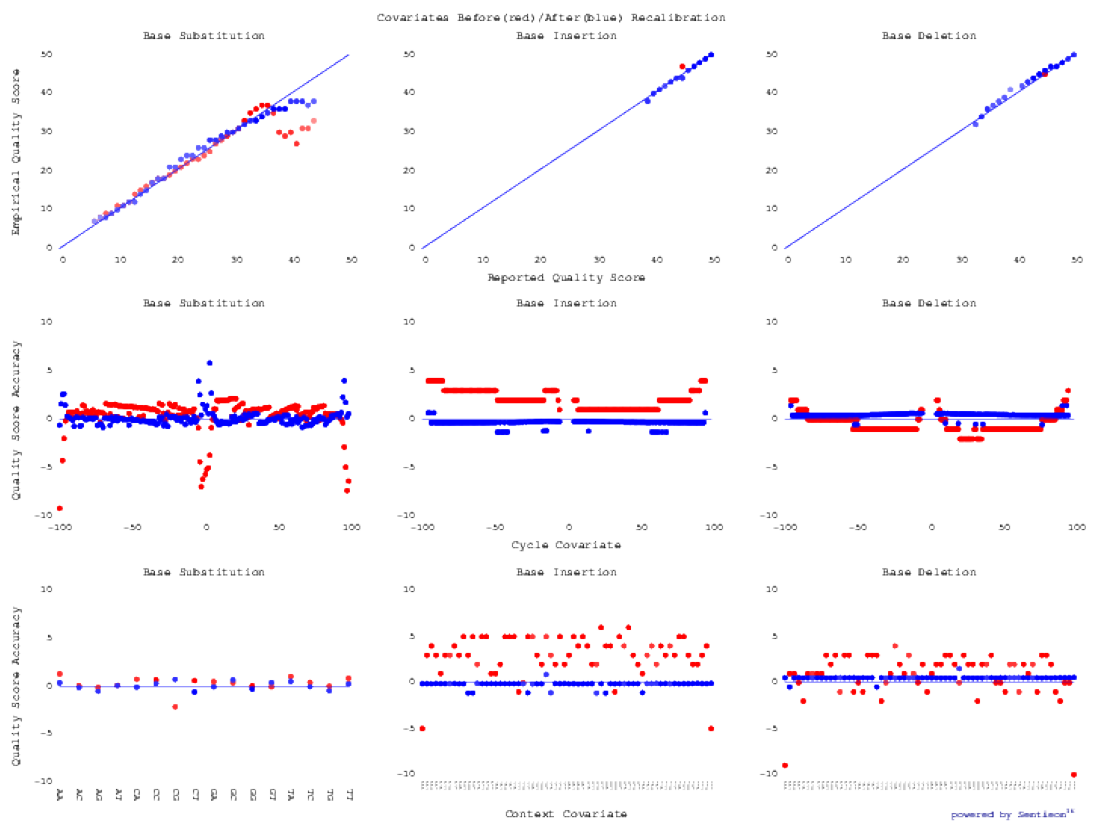

In [40]:
#SAMPLE = batch[0][0]
#img = WImage(filename=SAMPLE+"N_recal_plots.pdf")
    
#interact(multiPage, Sample=widgNor, page=[1,2] , file=fixed("_N_recal_plots.pdf"), normal=fixed(True), listSample = fixed([]));




id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["ABT414_Flank"];

myDropdown(select,options)

var type"""+str(id)+""" = "_N_recal_plots.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)




In [41]:
# ReadWriter to output recalibrated bam
command5 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+SAMPLE+"N_realigned.bam -q "+SAMPLE+"N_recal_data.table --algo ReadWriter "+SAMPLE+"N_recal.bam"
print(command5+'\n')
if exec_scripts:
    subprocess.check_output(command5,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i ABT414_FlankN_realigned.bam -q ABT414_FlankN_recal_data.table --algo ReadWriter ABT414_FlankN_recal.bam



# 5a. Base recalibration for tumor sample

In [42]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_realigned.bam --algo QualCal -k "+data['dbsnp']+" -k "+data['known_Mills_indels']+" -k "+data['known_1000G_indels']+" "+TUMOR+"T_recal_data.table"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_realigned.bam --algo QualCal -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz A1783T_recal_data.table

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_realigned.bam --algo QualCal -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confide

In [43]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_realigned.bam -q "+TUMOR+"T_recal_data.table --algo QualCal -k "+data['dbsnp']+" -k "+data['known_Mills_indels']+" -k "+data['known_1000G_indels']+" "+TUMOR+"T_recal_data.table.post"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_realigned.bam -q A1783T_recal_data.table --algo QualCal -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/1000G_phase1.snps.high_confidence.vcf.gz A1783T_recal_data.table.post

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_realigned.bam -q A9155T_recal_data.table --algo QualCal -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz -k /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/Mills_and_1000G_gold_standard.indels.vcf.gz -k /storage/gluster/vol1/bcbio/gen

In [44]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command3 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" --algo QualCal --plot --before "+TUMOR+"T_recal_data.table --after "+TUMOR+"T_recal_data.table.post "+TUMOR+"T_recal.csv"
    print(command3+'\n')
    if exec_scripts:
        subprocess.check_output(command3,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 --algo QualCal --plot --before A1783T_recal_data.table --after A1783T_recal_data.table.post A1783T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 --algo QualCal --plot --before A9155T_recal_data.table --after A9155T_recal_data.table.post A9155T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 --algo QualCal --plot --before A9878T_recal_data.table --after A9878T_recal_data.table.post A9878T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 --algo QualCal --plot --before AT2550T_recal_data.table --after AT2550T_recal_data.table.post AT2550T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 --algo QualCal --plot --before AT2822T_recal_data.table --after AT2

In [45]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command4 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon plot QualCal -o "+TUMOR+"T_recal_plots.pdf "+TUMOR+"T_recal.csv"
    print(command4+'\n')
    if exec_scripts:
        subprocess.check_output(command4,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o A1783T_recal_plots.pdf A1783T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o A9155T_recal_plots.pdf A9155T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o A9878T_recal_plots.pdf A9878T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o AT2550T_recal_plots.pdf AT2550T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o AT2822T_recal_plots.pdf AT2822T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o AT4415T_recal_plots.pdf AT4415T_recal.csv

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon plot QualCal -o AT4808T_recal_plots.pdf AT4808T_recal.csv

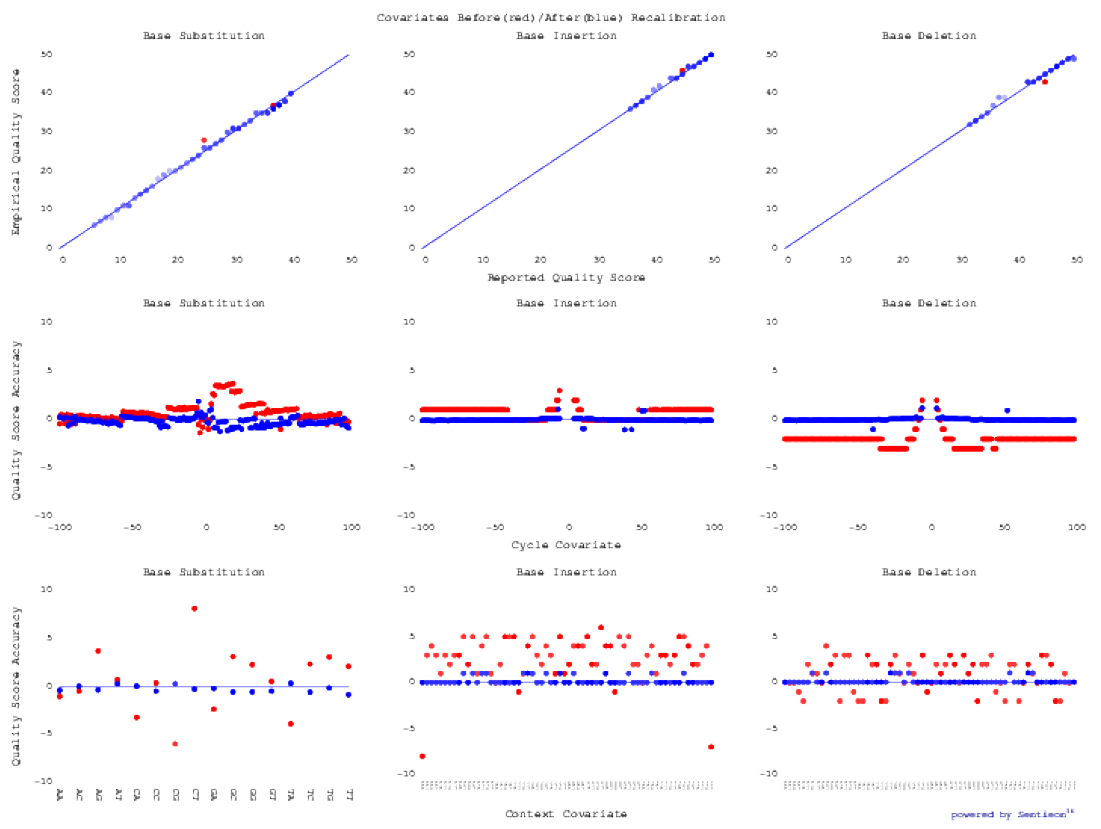

In [46]:
#interact(multiPage, Sample=widgTum, page=[1,2] , file=fixed("_T_recal_plots.pdf"), normal=fixed(True), listSample = fixed(tumors));



id = id +1

input_form = """

<select id='selectSample"""+str(id)+"""'>  </select>

<body onload="myFunction()">

<h1>The sample is:  <span id="myText"""+str(id)+""""></span></h1>

<div>
  <iframe id="pdf"""+str(id)+"""" src="" style="width:100%;height:700px;"></iframe>
</div>


</body>

"""

javascript = """

<script type="text/Javascript">

var select = document.getElementById("selectSample"""+str(id)+"""");

document.getElementById("myText"""+str(id)+"""").innerHTML = options;

var options = ["A9155","A9878","AT2550","AT2822","AT4415","AT4808","C0288","C0334","C1572","C8448"];

myDropdown(select,options)

var type"""+str(id)+""" = "_T_recal_plots.pdf"

myFunction(type"""+str(id)+""","""+str(id)+""")

document.getElementById("selectSample"""+str(id)+"""").onchange = function() {myFunction(type"""+str(id)+""","""+str(id)+""")};


</script>
"""
    

HTML(input_form + javascript)

In [47]:
# ReadWriter to output recalibrated bam
for i in range(batchSize):
    TUMOR = batch[i][1]
    command5 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_realigned.bam -q "+TUMOR+"T_recal_data.table --algo ReadWriter "+TUMOR+"T_recal.bam"
    print(command5+'\n')
    if exec_scripts:
        subprocess.check_output(command5,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_realigned.bam -q A1783T_recal_data.table --algo ReadWriter A1783T_recal.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_realigned.bam -q A9155T_recal_data.table --algo ReadWriter A9155T_recal.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9878T_realigned.bam -q A9878T_recal_data.table --algo ReadWriter A9878T_recal.bam

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i AT2550T_realigned.bam -q AT2550T_recal_data.table --algo ReadWriter AT2550T_recal.ba

# 7a. HC Variant caller (normal)

In [48]:
command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+SAMPLE+"N_recal.bam --algo Haplotyper -d "+data['dbsnp']+" --emit_conf=30 --call_conf=30 "+SAMPLE+"N-output-hc.vcf.gz"
print(command1+'\n')
if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i ABT414_FlankN_recal.bam --algo Haplotyper -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --emit_conf=30 --call_conf=30 ABT414_FlankN-output-hc.vcf.gz



# 7a. HC Variant caller (tumor)

In [49]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_recal.bam --algo Haplotyper -d "+data['dbsnp']+" --emit_conf=30 --call_conf=30 "+TUMOR+"T-output-hc.vcf.gz"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_recal.bam --algo Haplotyper -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --emit_conf=30 --call_conf=30 A1783T-output-hc.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_recal.bam --algo Haplotyper -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --emit_conf=30 --call_conf=30 A9155T-output-hc.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9878T_recal.bam --algo Haplotyper -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --emit_conf=30 --call_conf=30 A9878T-output-hc.

# 8a. Variant calling DNAscope (normal)

In [50]:
command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -r "+data['fasta']+" -i "+SAMPLE+"N_recal.bam --algo DNAscope -d "+data['dbsnp']+" --model "+data['ML_MODEL_N']+" "+SAMPLE+"N-tmpDNAscope.vcf.gz"
print(command1+'\n')
if exec_scripts:
    subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -i ABT414_FlankN_recal.bam --algo DNAscope -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelBeta0.4a-201808.05.model ABT414_FlankN-tmpDNAscope.vcf.gz



In [51]:
command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -r "+data['fasta']+" --algo DNAModelApply --model "+data['ML_MODEL_N']+" -v "+SAMPLE+"N-tmpDNAscope.vcf.gz "+SAMPLE+"N-DNAscope.vcf.gz"
print(command2+'\n')
if exec_scripts:
    subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo DNAModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelBeta0.4a-201808.05.model -v ABT414_FlankN-tmpDNAscope.vcf.gz ABT414_FlankN-DNAscope.vcf.gz



In [52]:
command3 = data['bcfdir'] + " filter -s ML_FAIL -i INFO/ML_PROB > 0.81 "+SAMPLE+"N-DNAscope.vcf.gz -O z -m x -o "+SAMPLE+"N-filtDNAscope.vcf.gz"
print(command3+'\n')
if exec_scripts:
    subprocess.check_output(command3,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.81 ABT414_FlankN-DNAscope.vcf.gz -O z -m x -o ABT414_FlankN-filtDNAscope.vcf.gz



# 8a. Variant calling DNAscope (tumor)

In [53]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -r "+data['fasta']+" -i "+TUMOR+"T_recal.bam --algo DNAscope -d "+data['dbsnp']+" --model "+data['ML_MODEL_N']+" "+TUMOR+"T-tmpDNAscope.vcf.gz"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -i A1783T_recal.bam --algo DNAscope -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelBeta0.4a-201808.05.model A1783T-tmpDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -i A9155T_recal.bam --algo DNAscope -d /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelBeta0.4a-201808.05.model A9155T-tmpDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapien

In [54]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -r "+data['fasta']+" --algo DNAModelApply --model "+data['ML_MODEL_N']+" -v "+TUMOR+"T-tmpDNAscope.vcf.gz "+TUMOR+"T-DNAscope.vcf.gz"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo DNAModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelBeta0.4a-201808.05.model -v A1783T-tmpDNAscope.vcf.gz A1783T-DNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo DNAModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelBeta0.4a-201808.05.model -v A9155T-tmpDNAscope.vcf.gz A9155T-DNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo DNAModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonDNAscopeModelB

In [55]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command3 = data['bcfdir'] + " filter -s ML_FAIL -i INFO/ML_PROB > 0.81 "+TUMOR+"T-DNAscope.vcf.gz -O z -m x -o "+TUMOR+"T-filtDNAscope.vcf.gz"
    print(command3+'\n')
    if exec_scripts:
        subprocess.check_output(command3,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.81 A1783T-DNAscope.vcf.gz -O z -m x -o A1783T-filtDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.81 A9155T-DNAscope.vcf.gz -O z -m x -o A9155T-filtDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.81 A9878T-DNAscope.vcf.gz -O z -m x -o A9878T-filtDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.81 AT2550T-DNAscope.vcf.gz -O z -m x -o AT2550T-filtDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.81 AT2822T-DNAscope.vcf.gz -O z -m x -o AT2822T-filtDNAscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i INFO/ML_PROB > 0.8

# 9a. Variant Annotation (normal)

In [56]:
command1 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+SAMPLE+"N-output-hc.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+SAMPLE+"N-output-hc.snpEff.vcf.gz"
print(command1+'\n')
if exec_scripts:
    subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 ABT414_FlankN-output-hc.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > ABT414_FlankN-output-hc.snpEff.vcf.gz



In [57]:
command2 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+SAMPLE+"N-filtDNAscope.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+SAMPLE+"N-filtDNAscope.snpEff.vcf.gz"
print(command2+'\n')
if exec_scripts:
    subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 ABT414_FlankN-filtDNAscope.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > ABT414_FlankN-filtDNAscope.snpEff.vcf.gz



# 9a. Variant Annotation (tumor)

In [58]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command1 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+TUMOR+"T-output-hc.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+TUMOR+"T-output-hc.snpEff.vcf.gz"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A1783T-output-hc.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A1783T-output-hc.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A9155T-output-hc.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A9155T-output-hc.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms10

In [59]:
for i in range(batchSize):
    TUMOR = batch[i][1]
    command2 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+TUMOR+"T-filtDNAscope.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+TUMOR+"T-filtDNAscope.snpEff.vcf.gz"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A1783T-filtDNAscope.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A1783T-filtDNAscope.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A9155T-filtDNAscope.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A9155T-filtDNAscope.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/s

# 7b. Somatic Variant Calling TNseq

In [60]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_recal.bam -i "+SAMPLE+"N_recal.bam --algo TNsnv --tumor_sample "+TUMOR+"T --normal_sample "+SAMPLE+"N --pon "+data['panel_of_normal_TNsnv'] +" --cosmic "+data['cosmic_db']+" --dbsnp "+data['dbsnp']+" --call_stats_out "+TUMOR+"-call.stats "+TUMOR+"-TNsnv.vcf.gz"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_recal.bam -i ABT414_FlankN_recal.bam --algo TNsnv --tumor_sample A1783T --normal_sample ABT414_FlankN --pon /storage/gluster/vol1/data/PUBLIC/NGS_ReferenceDatabase/firecloud_PoNs/reference_PoNs_refseq_exome_10bp_hg19_300_1kg_normal_panel_CHR.vcf.gz --cosmic /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/cosmic.vcf.gz --dbsnp /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --call_stats_out A1783-call.stats A1783-TNsnv.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_recal.bam -i ABT414_FlankN_recal.bam --algo TNsnv --tumor_sample A9155T --normal_sample ABT414_FlankN --pon /storage/gluster/vol1/data/PUBLIC/NGS_ReferenceDatabase/firecloud_PoNs/refe

In [61]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_recal.bam -i "+SAMPLE+"N_recal.bam --algo TNhaplotyper --tumor_sample "+TUMOR+"T --normal_sample "+SAMPLE+"N --pon "+data['panel_of_normal_TNhaplotyper']+" --cosmic "+data['cosmic_db']+" --dbsnp "+data['dbsnp']+" "+TUMOR+"-TNhaplotyper.vcf.gz"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_recal.bam -i ABT414_FlankN_recal.bam --algo TNhaplotyper --tumor_sample A1783T --normal_sample ABT414_FlankN --pon /storage/gluster/vol1/data/PUBLIC/NGS_ReferenceDatabase/firecloud_PoNs/reference_PoNs_refseq_exome_10bp_hg19_300_1kg_normal_panel_CHR.vcf.gz --cosmic /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/cosmic.vcf.gz --dbsnp /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz A1783-TNhaplotyper.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_recal.bam -i ABT414_FlankN_recal.bam --algo TNhaplotyper --tumor_sample A9155T --normal_sample ABT414_FlankN --pon /storage/gluster/vol1/data/PUBLIC/NGS_ReferenceDatabase/firecloud_PoNs/reference_PoNs_re

# 8b. Somatic Variant calling TNscope

In [62]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command1 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -r "+data['fasta']+" -t "+str(data['nt'])+" -i "+TUMOR+"T_recal.bam -i "+SAMPLE+"N_recal.bam --algo TNscope --tumor_sample "+TUMOR+"T --normal_sample "+SAMPLE+"N --dbsnp "+data['dbsnp']+" --clip_by_minbq 1 --max_error_per_read 3 --min_init_tumor_lod 2.0 --min_base_qual 10 --min_base_qual_asm 10 --min_tumor_allele_frac 0.00005 "+TUMOR+"-tmpTNscope.vcf.gz"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A1783T_recal.bam -i ABT414_FlankN_recal.bam --algo TNscope --tumor_sample A1783T --normal_sample ABT414_FlankN --dbsnp /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --clip_by_minbq 1 --max_error_per_read 3 --min_init_tumor_lod 2.0 --min_base_qual 10 --min_base_qual_asm 10 --min_tumor_allele_frac 0.00005 A1783-tmpTNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa -t 80 -i A9155T_recal.bam -i ABT414_FlankN_recal.bam --algo TNscope --tumor_sample A9155T --normal_sample ABT414_FlankN --dbsnp /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/variation/dbsnp-150.vcf.gz --clip_by_minbq 1 --max_error_per_read 3 --min_init_tumor_lod 2.0 --min_base_qual 10 --min_base_qual_asm 10 --m

In [63]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command2 = data['SENTIEON_INSTALL_DIR']+"/bin/sentieon driver -t "+str(data['nt'])+" -r "+data['fasta']+" --algo TNModelApply --model "+data['ML_MODEL_T'] +" -v "+TUMOR+"-tmpTNscope.vcf.gz "+TUMOR+"-TNscope.vcf.gz"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo TNModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonTNscopeModel_GiAB_HighAF_LowFP-201711.05.model -v A1783-tmpTNscope.vcf.gz A1783-TNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo TNModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonTNscopeModel_GiAB_HighAF_LowFP-201711.05.model -v A9155-tmpTNscope.vcf.gz A9155-TNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/SENTIEON/sentieon-genomics-201911/bin/sentieon driver -t 80 -r /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/bwa/hg19.fa --algo TNModelApply --model /storage/gluster/vol1/data/PUBLIC/Tools/sentieon-genomics-201808.05/SentieonTNscope

In [64]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command3 = data['bcfdir'] + " filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 "+TUMOR+"-TNscope.vcf.gz -O z -m x -o "+TUMOR+ "-filtTNscope.vcf.gz"
    print(command3+'\n')
    if exec_scripts:
        subprocess.check_output(command3,shell=True)

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 A1783-TNscope.vcf.gz -O z -m x -o A1783-filtTNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 A9155-TNscope.vcf.gz -O z -m x -o A9155-filtTNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 A9878-TNscope.vcf.gz -O z -m x -o A9878-filtTNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 AT2550-TNscope.vcf.gz -O z -m x -o AT2550-filtTNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 AT2822-TNscope.vcf.gz -O z -m x -o AT2822-filtTNscope.vcf.gz

/storage/gluster/vol1/SHARED/NGSTOOLS/BCBIO/bcbio/anaconda/bin/bcftools filter -s ML_FAIL -i \INFO/ML_PROB > 0.81 AT4415-TNsco

# 9a. Somatic Variant Annotation

In [65]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command1 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+TUMOR+"-TNsnv.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+TUMOR+"-TNsnv.snpEff.vcf.gz"
    print(command1+'\n')
    if exec_scripts:
        subprocess.check_output(command1,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A1783-TNsnv.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A1783-TNsnv.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A9155-TNsnv.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A9155-TNsnv.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djav

In [66]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command2 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+TUMOR+"-TNhaplotyper.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+TUMOR+"-TNhaplotyper.snpEff.vcf.gz"
    print(command2+'\n')
    if exec_scripts:
        subprocess.check_output(command2,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A1783-TNhaplotyper.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A1783-TNhaplotyper.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A9155-TNhaplotyper.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A9155-TNhaplotyper.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEf

In [67]:
for i in range(batchSize):
    SAMPLE = batch[i][0]
    TUMOR = batch[i][1]
    command3 = "/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir="+data['SENTIEON_TMPDIR']+" eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 "+TUMOR+"-filtTNscope.vcf.gz | "+data['bgzipdir']+" --threads "+str(data['nt'])+" -c > "+TUMOR+"-filtTNscope.snpEff.vcf.gz"
    print(command3+'\n')
    if exec_scripts:
        subprocess.check_output(command3,shell=True)

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A1783-filtTNscope.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A1783-filtTNscope.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -Xms1000m -Xmx36400m -Djava.io.tmpdir=/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/ABT414_Flank//$SAMPLE/tmpdir eff -noStats -t -noLog -dataDir /storage/gluster/vol1/bcbio/genomes/Hsapiens/hg19/snpeff -hgvs -noLof -i vcf -o vcf -noInteraction -noMotif -noNextProt -strict GRCh37.75 A9155-filtTNscope.vcf.gz | /glusterfs/biostorage1/brick1/data/PUBLIC/Tools/lib/bin/bgzip --threads 80 -c > A9155-filtTNscope.snpEff.vcf.gz

/storage/gluster/vol1/bcbio/anaconda/bin/snpEff -X

In [117]:
!rm html_pipeline.zip
!rm -r ./data
!mkdir data

In [118]:
!jupyter nbconvert --no-input --execute --ExecutePreprocessor.timeout=-1 --output-dir='./data' --to html pipeline.ipynb
!cp /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414_WES_Analysis/ABT414_Flank/ABT414_Flank/*.pdf ./data
!cp /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414_WES_Analysis/ABT414_Flank/ABT414_Flank/*_N_aln_metrics.txt ./data
!cp /storage/gluster/vol1/data/PUBLIC/SCAMBIO/ABT414_WES_Analysis/ABT414_Flank/ABT414_Flank/*_T_aln_metrics.txt ./data
!zip -r "html_pipeline" "./data"


[NbConvertApp] Converting notebook pipeline.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
/storage/gluster/vol1/SHARED/HOMEFOLDERS/adefalco/pipeline/lib/python3.6/site-packages/jupyter_client/manager.py:358: FutureWarning: Method cleanup(connection_file=True) is deprecated, use cleanup_resources(restart=False).
  FutureWarning)
[NbConvertApp] Writing 481775 bytes to ./data/pipeline.html
  adding: data/ (stored 0%)
  adding: data/pipeline.html (deflated 87%)
  adding: data/A1783_T_gc-report.pdf (deflated 7%)
  adding: data/A1783_T_is-report.pdf (deflated 9%)
  adding: data/A1783_T_mq-report.pdf (deflated 11%)
  adding: data/A1783_T_qd-report.pdf (deflated 13%)
  adding: data/A1783_T_recal_plots.pdf (deflated 5%)
  adding: data/A9155_T_gc-report.pdf (deflated 7%)
  adding: data/A9155_T_is-report.pdf (deflated 9%)
  adding: data/A9155_T_mq-report.pdf (deflated 11%)
  adding: data/A9155_T_qd-report.pdf (deflated 13%)
  adding: data/A9155_T_recal_plots.pdf (deflated 6

In [35]:
#!python -m nbconvert /home/adefalco/pipeline.ipynb  --to ipynb --execute

In [70]:
#import nbinteract as nbi
#nbi.publish('AntonioDeFalco/testInteract/master', 'pipeline.ipynb')

In [71]:
#!jupyter nbconvert /home/adefalco/pipeline.ipynb --to rst

In [72]:
#!jupyter nbconvert /home/adefalco/pipeline.ipynb --to Interact